# Importing Dependencies

To start our analysis we need to import our dependencies to assist with analysing the data.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Load dataset and save as 'wine' variable

After importing all dependencies we load our dataset called wine.

In [40]:
wine = pd.read_json('./wine-reviews/winemag-data-130k-v2.json', dtype='unicode');

# Reviewing dataset

In [41]:
wine.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Looking a data index to see how many rows the dataset contains

In [42]:
wine.index

RangeIndex(start=0, stop=129971, step=1)

### Looking a data column names and how many columns are in the dataset.

In [74]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

### Reviewing shape of dataset to see the amount of rows and columns

In [44]:
wine.shape

(129971, 13)

### Reviewing data types to understand the various types of data are within the dataset

In [45]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null object
description              129971 non-null object
designation              129971 non-null object
points                   129971 non-null object
price                    129971 non-null object
province                 129971 non-null object
region_1                 129971 non-null object
region_2                 129971 non-null object
taster_name              129971 non-null object
taster_twitter_handle    129971 non-null object
title                    129971 non-null object
variety                  129971 non-null object
winery                   129971 non-null object
dtypes: object(13)
memory usage: 12.9+ MB


### Reviewing if there are any null values or values without any input

In [75]:
wine.isnull().sum()

country                     0
description                 0
designation                 0
points                      0
price                    8996
province                    0
region_1                    0
region_2                    0
taster_name                 0
taster_twitter_handle       0
title                       0
variety                     0
winery                      0
dtype: int64

### Changing points and price columns to integar and float after noticing that those values were not the appropriate dtype. This will assist with further analysis to understand the relationships between variables.

In [47]:
wine['points'] = wine.points.astype(int)
wine['price'] = wine.price.astype(float)
wine.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


### Confirming updated dtypes were changed from the function above

In [48]:
wine.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

### Rechecking if there are any null values after dtype change from object to integar and float

In [76]:
wine.isnull().sum()

country                     0
description                 0
designation                 0
points                      0
price                    8996
province                    0
region_1                    0
region_2                    0
taster_name                 0
taster_twitter_handle       0
title                       0
variety                     0
winery                      0
dtype: int64

### Currently looking for duplicate wines. 
No duplicates due to designation and variety

In [50]:
wine[wine.duplicated(['title'])].sort_values('title')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
93375,Spain,Dusty notes of citrus fruits are mild but frie...,Brut,87,16.0,Catalonia,Cava,None,Michael Schachner,@wineschach,1+1=3 NV Brut Sparkling (Cava),Sparkling Blend,1+1=3
56109,Spain,"Clean, fresh apple aromas and a minerally, cit...",Cygnus Brut Nature Reserva Made With Organic G...,89,20.0,Catalonia,Cava,None,Michael Schachner,@wineschach,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Sparkling Blend,1+1=3
100235,US,"Merlot, Cabernet and Syrah form the core of th...",Hot To Trot,86,10.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,14 Hands 2011 Hot To Trot Red (Columbia Valley...,Red Blend,14 Hands
68750,US,In just a few years 14 Hands Riesling producti...,None,88,10.0,Washington,Washington,Washington Other,Paul Gregutt,@paulgwine,14 Hands 2013 Riesling (Washington),Riesling,14 Hands
57235,US,Dried herb and wood spice aromas are followed ...,The Reserve,90,30.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands 2013 The Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,14 Hands
26499,US,"Aromas are light, with notes of matchstick, he...",Limited Release Kentucky Derby,87,12.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands 2014 Limited Release Kentucky Derby R...,Red Blend,14 Hands
116037,US,"The aromas of barrel spice, toast, herb and pl...",None,88,12.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands 2015 Cabernet Sauvignon (Columbia Val...,Cabernet Sauvignon,14 Hands
108391,US,"Light aromas of lemon, apple, pineapple, toast...",Brut Méthode Champenoise,87,15.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands NV Brut Méthode Champenoise Sparkling...,Sparkling Blend,14 Hands
73229,US,This is the inaugural release from this Oregon...,Proprietary,92,75.0,Oregon,Walla Walla Valley (OR),Oregon Other,Sean P. Sullivan,@wawinereport,18401 Cellars 2013 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars
92133,Portugal,"With aromas of superripe fruit, this wood aged...",Vinhas Velhas Branco,90,NaN,Douro,None,None,Roger Voss,@vossroger,1912 Winemakers 2011 Vinhas Velhas Branco Whit...,Portuguese White,1912 Winemakers


### Ploting the top 10 region_1 that produce the most wine

If you refer to the chart below you'll notice that there are an enormous amount of wine that haven't been categorized to a region_1

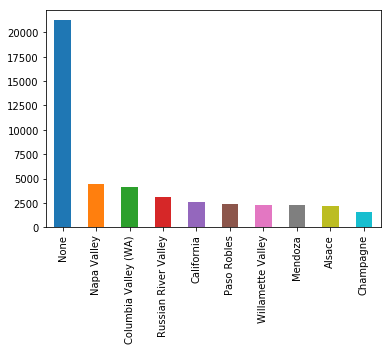

In [118]:
wine.region_1.value_counts().head(10).plot(kind='bar');

After removing all wines without a region_1 assigned you'll notice in the bar plot below the top 10 region_1 with Napa Valley being the region_1 that produces the most wine.

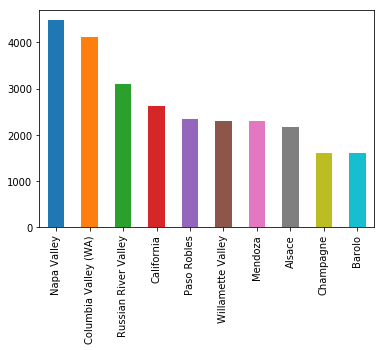

In [101]:
wine.loc[wine['region_1'] != 'None', :].region_1.value_counts().head(10).plot(kind='bar');

### Ploting the top 10 region_2 that produce the most wine

If you refer to the chart below you'll notice that there are an enormous amount of wine that haven't been categorized to a region_2. Similar to Region_1.

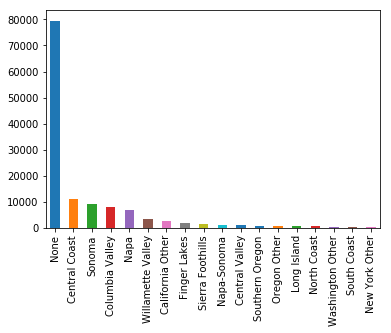

In [102]:
wine.region_2.value_counts().plot(kind='bar');

After removing all wines without a region_2 assigned you'll notice in the bar plot below the top 10 region_2 with Central Coast being the region_2 that produces the most wine.

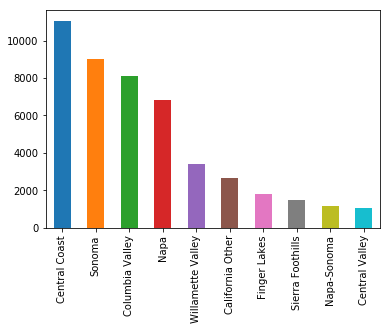

In [103]:
wine.loc[wine['region_2'] != 'None', :].region_2.value_counts().head(10).plot(kind='bar');

### Ploting the top 15 countries that produce the most wine
The U.S. produces the most wine be a large margin with over 50k.

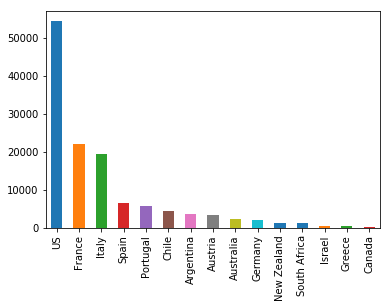

In [104]:
wine.country.value_counts().head(15).plot(kind='bar');

### Ploting the top 15 provinces that produce the most wine
It appears that California produces the most wine with over 35k. The next closest province is Washington with close to 10k.

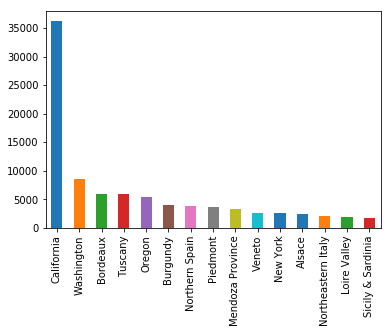

In [54]:
wine.province.value_counts().head(15).plot(kind='bar');

### Ploting the top 15 varieties that produce the most wine
It appears that Pinot Noir produces the most wine with over 12k. Chardonnay comes second with slightly less than 12k followed by Cabernet Sauvignon with less than 10k.

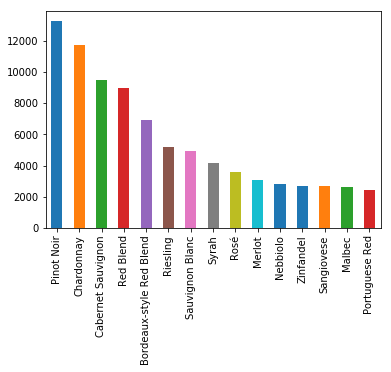

In [55]:
wine.variety.value_counts().head(15).plot(kind='bar');

### Wine Summary Statistics
The average points review for all wines is 88 out of 100 while the average price is $35. The cheapest wine is $4 while the lowest review is 80 out of 100. Conversely, the most expensive wine is $3300 while the highest review is 100.

In [56]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Point review summary stats for a bottle of wine by country
The table below describes the count of wines, the average review, and quartiles information per country. For example, the U.S. has 54,504 wines that average a point review of 88. The minimum review in the U.S. is 80 while the maximum is 100.

In [57]:
wine.groupby('country').points.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
US,54504.0,88.563720,3.114840,80.0,86.0,88.0,91.00,100.0
France,22093.0,88.845109,3.044423,80.0,87.0,89.0,91.00,100.0
Italy,19540.0,88.562231,2.649756,80.0,87.0,88.0,90.00,100.0
Spain,6645.0,87.288337,3.066284,80.0,85.0,87.0,89.00,98.0
Portugal,5691.0,88.250220,2.996122,80.0,86.0,88.0,90.00,100.0
Chile,4472.0,86.493515,2.692959,80.0,85.0,86.0,88.00,95.0
Argentina,3800.0,86.710263,3.179627,80.0,84.0,87.0,89.00,97.0
Austria,3345.0,90.101345,2.499799,82.0,88.0,90.0,92.00,98.0
Australia,2329.0,88.580507,2.989900,80.0,87.0,89.0,91.00,100.0


### Price summary stats for a bottle of wine by country
The table below describes the count of wines, the average price, and price quartiles information per country. For example, the U.S. has about 54k wines that average a price of $36. The minimum price in the U.S. is $4 while the maximum is $2013.

In [58]:
wine.groupby('country').price.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
US,54265.0,36.573464,27.088857,4.0,20.00,30.0,45.00,2013.0
France,17776.0,41.139120,73.769404,5.0,16.00,25.0,43.00,3300.0
Italy,16914.0,39.663770,38.052479,5.0,18.00,28.0,50.00,900.0
Spain,6573.0,28.215275,34.662397,4.0,13.00,18.0,30.00,770.0
Portugal,4875.0,26.218256,41.175241,5.0,12.00,16.0,28.00,1000.0
Chile,4416.0,20.786458,21.929371,5.0,12.00,15.0,20.00,400.0
Argentina,3756.0,24.510117,23.430122,4.0,12.00,17.0,25.00,230.0
Austria,2799.0,30.762772,27.224797,7.0,18.00,25.0,36.50,1100.0
Australia,2294.0,35.437663,49.049458,5.0,15.00,21.0,38.00,850.0


### Point review stats for a bottle of wine by province
The table below describes the count of wines, the average point review, and review quartiles information per province. For example, the California has about 36k wines that average a review of 88. The minimum reivew in California is 80 while the maximum is 100.

In [59]:
wine.groupby('province').points.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
province,,,,,,,,
California,36247.0,88.627776,3.254020,80.0,86.0,89.0,91.0,100.0
Washington,8639.0,88.947216,2.654835,80.0,87.0,89.0,91.0,100.0
Bordeaux,5941.0,88.658980,3.252326,80.0,86.0,88.0,91.0,100.0
Tuscany,5897.0,89.074614,2.644699,80.0,87.0,89.0,91.0,100.0
Oregon,5373.0,89.051926,2.802526,80.0,87.0,89.0,91.0,99.0
Burgundy,3980.0,89.569347,3.110104,81.0,87.0,90.0,92.0,99.0
Northern Spain,3851.0,87.417035,3.153075,80.0,85.0,87.0,90.0,98.0
Piedmont,3729.0,89.536873,2.822597,82.0,87.0,89.0,92.0,99.0
Mendoza Province,3264.0,86.826593,3.233570,80.0,84.0,87.0,89.0,97.0


### Price stats for a bottle of wine by province
The table below describes the count of wines, the average price, and price quartiles information per province. For example, the California has about 36k wines that average a price of $39. The minimum price in the California is $4 while the maximum is $2013.


In [60]:
wine.groupby('province').price.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
province,,,,,,,,
California,36104.0,39.041048,30.259982,4.0,22.0,33.0,48.00,2013.0
Washington,8583.0,32.436444,18.559569,6.0,20.0,29.0,40.00,240.0
Oregon,5359.0,36.545064,20.224731,5.0,22.0,30.0,48.00,275.0
Tuscany,5128.0,47.683697,47.274103,6.0,21.0,35.0,60.00,900.0
Bordeaux,4002.0,38.911794,108.573516,6.0,15.0,20.0,33.00,3300.0
Northern Spain,3797.0,30.771925,38.876613,5.0,13.0,19.0,32.00,600.0
Mendoza Province,3226.0,25.053317,24.044538,4.0,12.0,17.0,26.00,230.0
Burgundy,3106.0,71.058274,101.446213,9.0,26.0,43.0,78.00,2500.0
Piedmont,3089.0,54.957268,43.568957,7.0,27.0,49.0,70.00,595.0


### Point review stats for a bottle of wine by variety
The table below describes the count of wines, the average point review, and review quartiles information per variety. For example, the Pinot Noir has about 13k wines that average a review of 89. The minimum reivew for Pinot Noir is 80 while the maximum is 99.

In [61]:
wine.groupby('variety').points.describe().sort_values(['count'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
variety,,,,,,,,
Pinot Noir,13272.0,89.411468,3.123967,80.0,87.0,90.0,92.0,99.0
Chardonnay,11753.0,88.340083,3.231557,80.0,86.0,88.0,91.0,100.0
Cabernet Sauvignon,9472.0,88.607580,3.316328,80.0,86.0,88.0,91.0,100.0
Red Blend,8946.0,88.380282,2.776897,80.0,87.0,88.0,90.0,99.0
Bordeaux-style Red Blend,6915.0,89.106435,3.136137,80.0,87.0,89.0,91.0,100.0
Riesling,5189.0,89.450183,2.862513,80.0,87.0,90.0,91.0,98.0
Sauvignon Blanc,4967.0,87.429636,2.685680,80.0,86.0,87.0,89.0,96.0
Syrah,4142.0,89.286577,3.037114,80.0,87.0,90.0,92.0,100.0
Rosé,3564.0,86.846240,2.526633,80.0,85.0,87.0,88.0,96.0


### Price stats for a bottle of wine by variety
The table below describes the count of wines, the average price, and price quartiles information per province. For example, the Pinot Noir has about 12k wines that average a price of $47. The minimum price in the Pinot Noir is $5 while the maximum is $2500.

In [62]:
wine.groupby('variety').price.describe().sort_values(['count'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
variety,,,,,,,,
Pinot Noir,12787.0,47.528897,47.609434,5.0,28.00,42.0,55.0,2500.0
Chardonnay,11080.0,34.522022,42.245055,4.0,18.00,26.0,40.0,2013.0
Cabernet Sauvignon,9386.0,47.940017,41.157236,4.0,20.00,37.0,65.0,625.0
Red Blend,8476.0,35.881194,30.318077,5.0,18.00,28.0,45.0,500.0
Bordeaux-style Red Blend,5340.0,47.210861,92.810629,7.0,19.75,30.0,50.0,3300.0
Riesling,4972.0,32.000402,43.061291,5.0,16.00,22.0,34.0,775.0
Sauvignon Blanc,4783.0,20.228518,9.871627,5.0,14.00,18.0,24.0,135.0
Syrah,4086.0,39.137788,27.324629,4.0,25.00,35.0,45.0,750.0
Rosé,3262.0,18.506438,16.325324,5.0,13.00,16.0,20.0,800.0


### Sorting wine by points and price
After reviewing the table below, you'll see that the most expensive wine with a 100 point review is Château Lafite Rothschild 2010 Pauillac from France.

In [63]:
wine.sort_values(['points', 'price'], ascending=False)  

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
111753,France,"Almost black in color, this stunning wine is g...",None,100,1500.0,Bordeaux,Pauillac,None,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,This is the finest Cheval Blanc for many years...,None,100,1500.0,Bordeaux,Saint-Émilion,None,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
122935,France,"Full of ripe fruit, opulent and concentrated, ...",None,100,848.0,Bordeaux,Pessac-Léognan,None,Roger Voss,@vossroger,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion
114972,Portugal,"A powerful and ripe wine, strongly influenced ...",Nacional Vintage,100,650.0,Port,None,None,Roger Voss,@vossroger,Quinta do Noval 2011 Nacional Vintage (Port),Port,Quinta do Noval
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,None,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,None,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,None,None,None,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,None,None,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
118058,US,This wine dazzles with perfection. Sourced fro...,La Muse,100,450.0,California,Sonoma County,Sonoma,None,None,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
111756,France,"A hugely powerful wine, full of dark, brooding...",None,100,359.0,Bordeaux,Saint-Julien,None,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases


### Points stats for a bottle of wine by region_1

The table below describes the count of wines, the average point review, and review quartiles information per region_1. For example, Napa Valley has about 4480k wines that average a review of 89. The minimum reivew for Pinot Noir is 80 while the maximum is 100.

In [108]:
wine.groupby('region_1').points.describe().sort_values(['count'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
region_1,,,,,,,,
None,21247.0,88.241022,2.949357,80.0,86.0,88.0,90.0,100.0
Napa Valley,4480.0,89.043750,3.188694,80.0,87.0,89.0,91.0,100.0
Columbia Valley (WA),4124.0,88.718477,2.573591,80.0,87.0,89.0,91.0,100.0
Russian River Valley,3091.0,89.525720,3.196514,80.0,87.0,90.0,92.0,98.0
California,2629.0,85.680107,2.731097,80.0,84.0,85.0,87.0,97.0
Paso Robles,2350.0,87.892340,3.134678,80.0,86.0,88.0,90.0,96.0
Mendoza,2301.0,86.501086,3.203480,80.0,84.0,86.0,89.0,97.0
Willamette Valley,2301.0,89.083877,2.671818,80.0,87.0,89.0,91.0,97.0
Alsace,2163.0,89.472954,3.025422,80.0,87.0,89.0,92.0,97.0


### Price stats for a bottle of wine by region_1
The table below describes the count of wines, the average price, and price quartiles information per province. For example, Napa Valley has about 4475k wines that average a price of $43. The minimum price in Napa Valley is $10 while the maximum is $625.

In [111]:
wine.groupby('region_1').price.describe().sort_values(['count'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
region_1,,,,,,,,
None,19575.0,27.214253,35.047968,4.0,13.0,19.0,30.0,1100.0
Napa Valley,4475.0,55.272179,43.827594,10.0,28.0,44.0,65.0,625.0
Columbia Valley (WA),4109.0,28.731321,16.376142,6.0,17.0,25.0,35.0,240.0
Russian River Valley,3090.0,41.225566,16.617025,10.0,28.0,40.0,50.0,125.0
California,2627.0,16.090217,11.229409,4.0,10.0,13.0,17.5,175.0
Paso Robles,2327.0,34.362699,22.127570,9.0,22.0,30.0,41.5,750.0
Willamette Valley,2296.0,35.038328,18.063609,5.0,20.0,30.0,45.0,275.0
Mendoza,2275.0,22.831648,21.764799,4.0,12.0,15.0,24.0,225.0
Alsace,1897.0,31.172905,17.701750,8.0,19.0,26.0,37.0,197.0


### Show the average of price and point review of all wines in US with a point rating over 90
We can leverage this function for multiple coutries of interest.

In [116]:
wine[(wine['country'] == 'US') & (wine['points'] > 90)].mean()

points    92.309150
price     53.658814
dtype: float64

### Are wine points and price correlated?
It may appear that point reviews and price are somewhat correlated, however, there are some outliers.

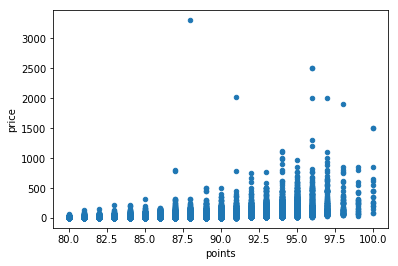

In [114]:
wine.plot(kind='scatter', x='points', y='price');

### For each combination of country, region 1, and variety show me the summary stats
So, for a Bonarda wine within Agrelo region of Argentina the average cost of a wine is $17.85. The chaepest is $15 and the most expensive is $23. 

In [73]:
wine.groupby(['country','region_1','variety'])['price'].describe()

count  \
country   region_1                 variety                            
Argentina Agrelo                   Bonarda                      7.0   
                                   Bordeaux-style Red Blend     2.0   
                                   Cabernet Franc               5.0   
                                   Cabernet Sauvignon          12.0   
                                   Chardonnay                   2.0   
                                   Malbec                      18.0   
                                   Petit Verdot                 2.0   
                                   Red Blend                    2.0   
          Alto Valle del Río Negro Cabernet Franc               3.0   
                                   Chardonnay                   7.0   
                                   Malbec                       6.0   
                                   Pinot Noir                   6.0   
                                   Red Blend                    1.0   
                                   Sauvignon Blanc              1.0   
          Altos de Mendoza         Malbec                       1.0   
          Argentina                Bonarda                      3.0   
                                   Bordeaux-style Red Blend     1.0   
                                   Cabernet Sauvignon           4.0   
                                   Cabernet Sauvignon-Syrah     1.0   
                                   Chardonnay                   2.0   
                                   Malbec                      10.0   
                                   Malbec-Bonarda               1.0   
                                   Malbec-Cabernet Sauvignon    1.0   
                                   Moscato                      1.0   
                                   Red Blend                    1.0   
                                   Sauvignon Blanc              1.0   
                                   Sparkling Blend              5.0   
                                   Syrah                        2.0   
                                   Torrontés                    3.0   
          Buenos Aires             Chardonnay                   1.0   
...                                                             ...   
US        Yountville               Petit Verdot                 1.0   
                                   Pinot Noir                   1.0   
                                   Red Blend                    1.0   
                                   Sauvignon Blanc              7.0   
                                   Sparkling Blend              3.0   
                                   Syrah                        3.0   
Ukraine   None                     Bastardo                     1.0   
                                   Cabernet Sauvignon           1.0   
                                   Chardonnay                   1.0   
                                   Merlot                       2.0   
                                   Muscat Hamburg               1.0   
                                   Riesling                     1.0   
                                   Rosé                         1.0   
                                   Sparkling Blend              6.0   
Uruguay   None                     Albariño                     6.0   
                                   Cabernet Franc               2.0   
                                   Cabernet Sauvignon           2.0   
                                   Chardonnay                   3.0   
                                   Malbec                       2.0   
                                   Merlot                       1.0   
                                   Pinot Noir                   5.0   
                                   Red Blend                   20.0   
                                   Rosé                         3.0   
                                   Sauvignon Blanc              1.0   
               